**Question 1:** What is Simple Linear Regression?

Simple Linear Regression (SLR) is a statistical technique used to model and analyze the relationship between two variables:

**Independent variable (X):** the predictor or input variable

**Dependent variable (Y):** the response or output variable

The relationship is expressed using a straight-line equation:

* 𝑌 = 𝛽0 + 𝛽1𝑋 + 𝜖

where:

* 𝛽0 = intercept (value of Y when X = 0)

* 𝛽1 = slope (change in Y for a one-unit change in X)

* 𝜖 = error term (difference between observed and predicted values)

The goal of SLR is to find the best-fitting line through the data points that minimizes the sum of squared differences between observed and predicted values.

* In practice, it is widely used for prediction (e.g., predicting sales from advertising spend) and for understanding the strength and direction of a linear relationship between two variables.

**Question 2:** What are the key assumptions of Simple Linear Regression?

Simple Linear Regression (SLR) relies on several key assumptions to ensure valid and reliable results:

* Linearity – The relationship between the independent variable (X) and dependent variable (Y) is linear.

* Independence of errors – Residuals (errors) are independent of each other.

* Homoscedasticity – The variance of residuals is constant across all values of X (no heteroscedasticity).

* Normality of errors – Residuals should be approximately normally distributed, especially important for hypothesis testing.

* No major outliers – Extreme data points should not overly influence the regression line.

When these assumptions are met, the regression model produces unbiased and reliable estimates.

**Question 3:** What is heteroscedasticity, and why is it important to address in regression models?

Heteroscedasticity occurs when the variance of residuals (errors) in a regression model is not constant across all levels of the independent variable(s).

Instead of having errors that are spread evenly (homoscedasticity), the spread of errors changes—either increasing or decreasing with the value of X.

**Why it matters:**

* It violates regression assumptions, making the model less reliable.

* Standard errors of coefficients become biased, leading to invalid t-tests and confidence intervals.

* The model may incorrectly estimate the significance of predictors, causing misleading conclusions.

**How to address it:**

* Apply transformations (e.g., log, square root) to stabilize variance.

* Use Weighted Least Squares or robust standard errors.

In short, addressing heteroscedasticity ensures more accurate, trustworthy regression results.

**Question 4:** What is Multiple Linear Regression?

Multiple Linear Regression (MLR) is a statistical technique used to model the relationship between a dependent variable (Y) and two or more independent variables (X₁, X₂, …, Xn).

The general equation is:

* 𝑌 = 𝛽0 + 𝛽1𝑋1 + 𝛽2𝑋2 + ⋯ + 𝛽𝑛𝑋𝑛 + 𝜖

where:

* 𝛽0 = intercept

* 𝛽1,𝛽2,…,𝛽𝑛 = coefficients (effect of each predictor on Y)

* 𝜖 = error term

**Key points:**

* It helps understand how multiple factors jointly influence the outcome.

* Useful for prediction (e.g., predicting house prices using area, number of rooms, and location).

* Assumes linearity, independence, homoscedasticity, normality of residuals, and low multicollinearity among predictors.

In simple terms, MLR extends simple linear regression by considering multiple predictors instead of just one.

**Question 5:** What is polynomial regression, and how does it differ from linear regression?

Polynomial Regression is a type of regression analysis where the relationship between the independent variable (X) and the dependent variable (Y) is modeled as an nth-degree polynomial.

The general form is:

* 𝑌 = 𝛽0 +𝛽1𝑋 + 𝛽2𝑋2 + 𝛽3𝑋3 + ⋯ + 𝛽𝑛𝑋𝑛 + 𝜖

**Difference from Linear Regression:**

Linear Regression assumes a straight-line relationship:

* 𝑌 = 𝛽0 + 𝛽1𝑋 + 𝜖

It captures only linear trends.

Polynomial Regression allows for curved relationships by including higher-degree terms of X (like 𝑋2,𝑋3), making it suitable for data that shows non-linear patterns.

**Example:**

*Linear regression:* Predicting weight from height (straight-line relation).

*Polynomial regression:* Predicting growth rate of plants over time, where growth accelerates and then slows down (curved relation).

In short, polynomial regression is an extension of linear regression that can fit non-linear patterns while still being linear in its coefficients.

**Question 6:** Implement a Python program to fit a Simple Linear Regression model to the following sample data:

● X = [1, 2, 3, 4, 5]

● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Plot the regression line over the data points.

Intercept (β0): 0.17999999999999794
Slope (β1): 1.9800000000000004


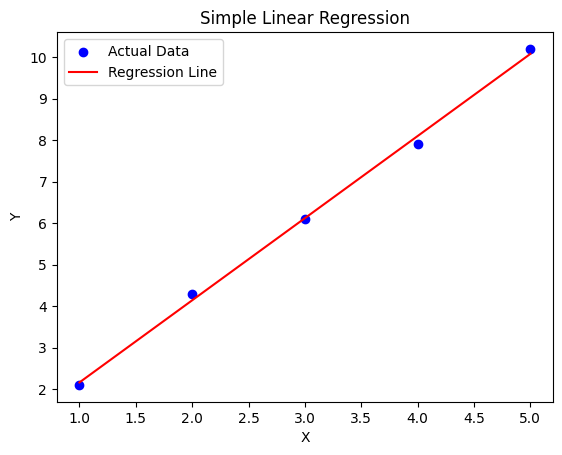

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)  # Independent variable
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])     # Dependent variable

# Create and train the model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Print coefficients
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])

# Plot data points and regression line
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

**Question 7:** Fit a Multiple Linear Regression model on this sample data:

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample Data
data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

# Define predictors (X) and target (y)
X = data[['Area', 'Rooms']]
y = data['Price']

# Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Print coefficients
print("Intercept (β0):", model.intercept_)
print("Coefficients (β):", model.coef_)

# Check VIF for multicollinearity
X_const = sm.add_constant(X)  # add intercept term for statsmodels
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)

Intercept (β0): 103157.89473684214
Coefficients (β): [   63.15789474 34736.84210526]

Variance Inflation Factor (VIF):
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


**Question 8:** Implement polynomial regression on the following data:

● X = [1, 2, 3, 4, 5]

● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.

Intercept (β0): 0.06000000000000938
Coefficients (β1, β2): [0.   1.94 0.2 ]


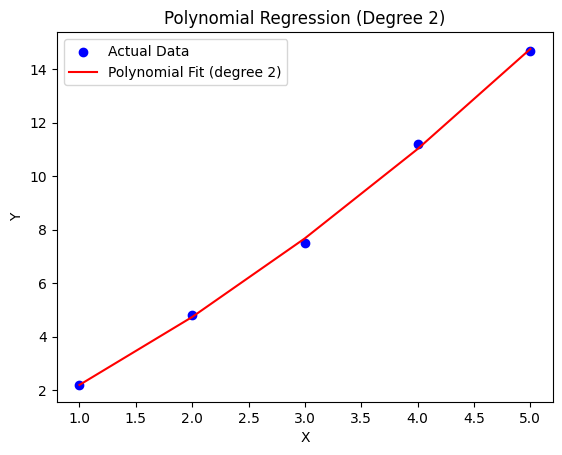

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform features for polynomial regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, Y)

# Predictions
Y_pred = model.predict(X_poly)

# Print coefficients
print("Intercept (β0):", model.intercept_)
print("Coefficients (β1, β2):", model.coef_)

# Plot
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Polynomial Fit (degree 2)')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()

**Question 9:** Create a residuals plot for a regression model trained on this data:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.
(Include your Python code and output in the code box below.)

Intercept (β0): 6.499999999999993
Slope (β1): 1.1500000000000001
Residuals: [-3.   5.5 -1.  -2.5  1. ]


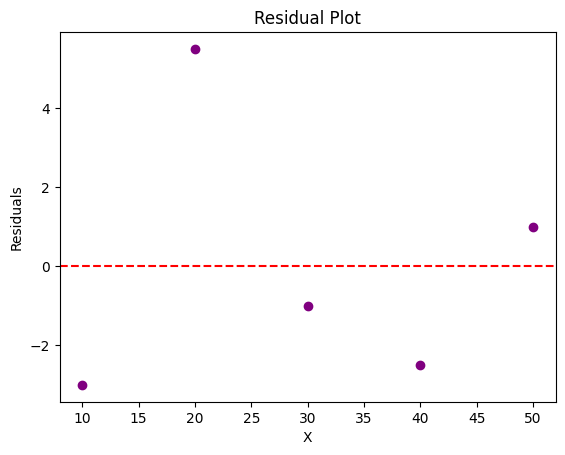

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1,1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Simple Linear Regression
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Residuals
residuals = Y - Y_pred

# Print model details
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])
print("Residuals:", residuals)

# Residual Plot
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

**Question 10:** Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

As a data scientist building a house price prediction model with features like area, number of rooms, and location, encountering heteroscedasticity and multicollinearity can reduce the reliability of regression results.

1. Detecting Issues

Heteroscedasticity: Use residual plots, Breusch–Pagan test, or White’s test.

Multicollinearity: Check correlation matrix and compute Variance Inflation Factor (VIF).

2. Addressing Heteroscedasticity

Data Transformation: Apply log, square root, or Box-Cox transformations on the dependent variable (house price) to stabilize variance.

Weighted Least Squares (WLS): Assign weights inversely proportional to variance of residuals.

Robust Standard Errors: Use heteroscedasticity-consistent standard errors (e.g., HC3 in statsmodels).

3. Addressing Multicollinearity

Feature Selection: Remove or combine highly correlated variables (e.g., area and number of rooms often overlap).

Regularization: Use Ridge or Lasso regression, which shrink coefficients and reduce multicollinearity impact.

Dimensionality Reduction: Apply Principal Component Analysis (PCA) to create uncorrelated components.

4. Building a Robust Model

Refit the regression after adjustments.

Validate assumptions again (check residuals and VIF).

Use cross-validation to ensure generalization.

Compare performance with alternative models (e.g., Decision Trees, Random Forests) if linear regression still underperforms.

**In summary:**

Handle heteroscedasticity with transformations, WLS, or robust errors.

Handle multicollinearity with feature selection, regularization, or PCA.

This ensures the model produces accurate predictions and reliable inference for decision-making.